<a href="https://colab.research.google.com/github/Malotrou/Zodiac_linguistic_analysis/blob/main/Z340_analysis_jarvle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INPUT**

### Standard english text generation

In [14]:
import nltk
from nltk.corpus import brown

# Scarica il corpus (solo la prima volta)
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [15]:
# Estraiamo circa 5000 caratteri di testo "News" (stile giornalistico anni '60)
testo_raw = " ".join(brown.words()[:10000])
testo_mistery = " ".join(brown.words(categories='mystery')[:10000])

# Pulizia: tutto maiuscolo e senza spazi per i tuoi test crittografici
StdEnglish = "".join(filter(str.isalpha, testo_raw)).upper()
StdEnglish_mistery = "".join(filter(str.isalpha, testo_mistery)).upper()

print(f"Lunghezza testo std: {len(StdEnglish)} caratteri")
print(StdEnglish[:100]) # Anteprima

print(f"Lunghezza testo mistery: {len(StdEnglish_mistery)} caratteri")
print(StdEnglish_mistery[:100]) # Anteprima


Lunghezza testo std: 43805 caratteri
THEFULTONCOUNTYGRANDJURYSAIDFRIDAYANINVESTIGATIONOFATLANTASRECENTPRIMARYELECTIONPRODUCEDNOEVIDENCETH
Lunghezza testo mistery: 34889 caratteri
THEREWERETHIRTYEIGHTPATIENTSONTHEBUSTHEMORNINGILEFTFORHANOVERMOSTOFTHEMDISTURBEDANDHALLUCINATINGANIN


### Zodiac inputs

In [24]:
# ==========================================
#      TESTI ORIGINALI
# ==========================================

# NOTA: Uso r"..." (raw string) per evitare che Python confonda '\' con comandi speciali.
Z340PlainUnt = "IHOPEYOUAREHAVINGLOTSOFFANINTRYINGTOCATCHMETHATWASNTMEONTHETVSHOWWHICHBRINGOUPAPOINTABOUTMEIAMNOTAFRAIDOFTHEGASCHAMBERBECAASEITWILLSENDMETOPARADLCEALLTHESOOHERBECAUSEENOWHAVEENOUGHSLAVESTOWORVFORMEWHEREEVERYONEELSEHASNOTHINGWHENTHEYREACHPARADICESOTHEYAREAFRAIDOFDEATHIAMNOTAFRAIDBECAUSEIVNOWTHATMYNEWLIFEWILLBEANEASYONEINPARADICEDEATHISLIFE"
# Qui ci sono simboli speciali, meglio usare r"" per sicurezza
Z340CipherUnt = r"H+M8|CV@KEB+*5k.LdR(UVFFz9<>#Z3P>L(MpOGp+2|G+l%WO&D#2b^D(+4(5J+VW)+kp+fZPYLR/8KjRk.#K_Rq#2|<z29^%OF1*HSMF;+BLKJp+l2_cTfBpzOUNyG)y7t-cYA2N:^j*Xz6dpclddG+4-RR+4Ef|pz/JNb>M)+l5||.VqL+Ut*5cUGR)VE5FVZ2cW+|TB45|TC^D4ct-c+zJYM(+y.LW+B.;+B31cOp+8lXz6Ppb&RG+BCOTBzF1K<SMF6N*(+HK29^:OFTO<Sf4pl/Ucy59^W(+l#2C.B)7<FBy-dkF|W<7t_BOYB*-CM>cHD8OZzSkpNA|K;+"
Z340PlainTrn = "IRONCAOOIIERGRTMLECHETTATNWNNIAABWEITEOHSRTWTWGTAISDCCLOAPAOYCAHHOAMBNOHALPLEVFIHSEIUCPOOFAASALYIFNMNTTVHAUTTMSERTONAGETTMSBPTAHBENAHUGNLIOHEHROMFEEIDDEASAASOHOSHACLIFEISSHOUVLRENNECEROAAMIEAOSEAVREONHSEFADNDITHEEVFEETTPOATFEOBVMEENEOELHHIERRATENYRNOSRVSHEENYAEATACONBOUTMOERHGRDYIHFAWEEWGHHWWYAWEIADIRUTWCEFILWILLEBNAEASYENONIECIDARAPDEATH"
Z340CipherTrn = r"HER>pl^VPk|1LTG2dNp+B(#O%DWY.<*Kf)By:cM+UZGW()L#zHJSpp7^l8*V3pO++RK2_9M+ztjd|5FP+&4k/p8R^FlO-*dCkF>2D(#5+Kq%;2UcXGV.zL|(G2Jfj#O+_NYz+@L9d<M+b+ZR2FBcyA64K-zlUV+^J+Op7<FBy-U+R/5tE|DYBpbTMKO2<clRJ|*5T4M.+&BFz69Sy#+N|5FBc(;8RlGFN^f524b.cV4t++yBX1*:49CE>VUZ5-+|c.3zBK(Op^.fMqG2RcT+L16C<+FlWB|)L++)WCzWcPOSHT/()p|FkdW<7tB_YOB*-Cc>MDHNpkSzZO8A|K;+"

Z408PlainUnt = "ILIKEKILLINGPEOPLEBECAUSEITISSOMUCHFUNITISMOREFUNTHANKILLINGWILDGAMEINTHEFORRESTBECAUSEMANISTHEMOATDANGEROUEANAMALOFALLTOKILLSOMETHINGGIVESMETHEMOATTHRILLINGEXPERENCEITISEVENBETTERTHANGETTINGYOURROCKSOFFWITHAGIRLTHEBESTPARTOFITIATHAEWHENIDIEIWILLBEREBORNINPARADISESNDALLTHEIHAVEKILLEDWILLBECOMEMYSLAVESIWILLNOTGIVEYOUMYNAMEBECAUSEYOUWILLTRYTOSLOIDOWNORSTOPMYCOLLECTINGOFSLAVSFORMYAFTERLIFEEBEORIETEMETHHPITI"
# ATTENZIONE QUI: Contiene caratteri come \p, \N che Python interpreterebbe male senza r""
Z408CipherUnt = r"9%P/Z/UB%kOR=pX=BWV+eGYF69HP@K!qYeMJY^UIk7qTtNQYD5)S(/9#BPORAU%fRlqEk^LMZJdr\pFHVWe8Y@+qGD9KI)6qX85zS(RNtIYElO8qGBTQS#BLd/P#B@XqEHMU^RRkcZKqpI)Wq!85LMr9#BPDR+j=6\N(eEUHkFZcpOVWI5+tL)l^R6HI9DR_TYr\de/@XJQAP5M8RUt%L)NVEKH=GrI!Jk598LMlNA)Z(PzUpkA9#BVW\+VTtOP^=SrlfUe67DzG%%IMNk)ScE/9%%ZfAP#BVpeXqWq_F#8c+@9A9B%OT5RUc+_dYq_^SqWVZeGYKE_TYA9%#Lt_H!FBX9zXADd\7L!=q_ed##6e5PORXQF%GcZ@JTtq_8JI+rBPQW6VEXr9WI6qEHM)=UIk"

# ==========================================
#      TESTI ELABORATI
# ==========================================

# (Spazio per i tuoi output futuri)

Z340CipherUnt_Cycled = r"H+R8|3^/lEN+O5P>L7VGUMFF*DkY(1Cy.L#RpK%p+2b:+z;WlJ9G2B^>(+c#5-+V)W+<p+fTHDLM@jO8RPY%*_^q:24kK2.V;zFZlySMFG+|LO&p+*2fNX_bpKzUB<()HtdJc9A24#RjlEO67p|*td%+N-^V+b1fBpK/&c4>MW+z5|NDR@L+U7l5bJ:^)VT5FMZ2BW+cX4|5NE3RYbBt-c+O&.^;+P9L)+4>G+|C1N*p+8KTzSkpbUV(+B3lZcOFX*yAMF64K#+<z2DR%lFEOHS_|p*qJNP5Y^W:+K;2C.b)dkFBWy7tfcz94l-3V>|<DjO1*AHpN6bKG+P&dkFB"
Z340CipherTrn_Cycled = r"HER>pl^VPk|1LTG27Np+b(#O%DWY.y*Kf)B<:cM+UZ;WG)L(zHJSpptRl8O^3p*++VK2_9M+zdj745FP+-|k/p8R^FlO&*tCyF>2D#%5+K@:;2UNXGVYzLb(#2Jfj%l+_B.O+qL9d<M+c+ER2F4|HA6N*-Kz&^+VU+lp7PFbkJ-+M/5t1B>Dcp4TRO*2y|K^&Nz5ZbVY+UBFlS.A<:+c45F|N;G8MO(FbRf52Bc94^|d++HNXE*#b>31DVJT5-+BcYCK4z%lpM._R@:2^|Z+LX63P+FOWNb)L++W)C*WBkKSyEq;)pcF<7WHtd4f9z|l&3N>VDPbpkAO1*j6BKG"

# ==========================================
#      CHIAVI ORIGINALI
# ==========================================

Z340key = {
    "A": [("*", 15.38), ("K", 17.95), ("l", 17.95), ("O", 25.64), ("z", 23.08)],
    "B": [("_", 42.86), ("f", 57.14)],
    "C": [("p", 100.00)],
    "D": [("6", 33.33), ("A", 22.22), ("S", 44.44)],
    "E": [("4", 13.04), ("|", 21.74), ("b", 6.52), ("B", 26.09), ("c", 21.74), ("N", 10.87)],
    "F": [("F", 100.00)],
    "G": [("L", 100.00)],
    "H": [("+", 100.00)],
    "I": [("<", 26.09), ("H", 17.39), ("k", 21.74), ("P", 13.04), ("y", 21.74)],
    "J": [],
    "K": [],
    "L": [("7", 25.00), ("d", 41.67), ("t", 33.33)],
    "M": [("2", 100.00)],
    "N": [("9", 18.18), (".", 27.27), (">", 18.18), ("D", 18.18), ("Y", 18.18)],
    "O": [("^", 22.22), ("M", 25.93), ("R", 29.63), ("V", 22.22)],
    "P": [("8", 66.67), ("j", 33.33)],
    "Q": [],
    "R": [("1", 17.65), ("E", 17.65), ("T", 29.41), ("X", 11.76), ("Z", 23.53)],
    "S": [("-", 31.25), ("&", 12.50), ("J", 25.00), ("U", 31.25)],
    "T": [(";", 12.00), (":", 8.00), ("(", 28.00), ("#", 20.00), ("%", 8.00), ("G", 24.00)],
    "U": [("@", 16.67), ("/", 50.00), ("q", 33.33)],
    "V": [("5", 100.00)],
    "W": [(")", 45.45), ("W", 54.55)],
    "X": [],
    "Y": [("3", 28.57), ("C", 71.43)],
    "Z": []
}


Z408Key = {
    "A": [("G", 29.17), ("S", 25.00), ("l", 20.83), ("8", 25.00)],
    "B": [("V", 100.00)],
    "C": [("e", 100.00)],
    "D": [("f", 42.86), ("z", 57.14)],
    "E": [("Z", 17.02), ("p", 12.77), ("W", 17.02), ("+", 17.02), ("6", 12.77), ("N", 10.64), ("E", 12.77)],
    "F": [("J", 54.55), ("Q", 45.45)],
    "G": [("R", 100.00)],
    "H": [("M", 50.00), (")", 50.00)],
    "I": [("9", 30.00), ("P", 27.50), ("U", 22.50), ("k", 20.00)],
    "J": [],
    "K": [("/", 100.00)],
    "L": [("*", 33.33), ("#", 30.30), ("B", 36.36)],
    "M": [("Q", 100.00)],
    "N": [("O", 30.43), ("^", 26.09), ("D", 26.09), ("(", 17.39)],
    "O": [("X", 30.77), ("!", 19.23), ("T", 26.92), ("d", 23.08)],
    "P": [("=", 100.00)],
    "Q": [],
    "R": [("t", 38.89), ("r", 33.33), ("\\", 27.78)],
    "S": [("F", 30.43), ("@", 26.09), ("K", 21.74), ("7", 21.74)],
    "T": [("H", 24.24), ("I", 27.27), ("5", 24.24), ("L", 24.24)],
    "U": [("Y", 100.00)],
    "V": [("c", 100.00)],
    "W": [("A", 100.00)],
    "X": [("j", 100.00)],
    "Y": [("_", 100.00)],
    "Z": []
}


# ==========================================
#      CHIAVI CUSTOM
# ==========================================

Z340key_flat = {
"A": ["l", "O", "*", "K", "z", "&", "d"],
"B": ["f"],
"C": ["p", "6"],
"D": ["S", "A"],
"E": ["|", "N", "b", "B", "c", "4", ";", "Z", "X"],
"F": ["F", "j"],
"G": ["L"],
"H": ["+", "9", "@", "q", "C"],
"I": ["H", "P", "k", "y"],
"J": [], # Attenzione: se il plaintext contiene J, lo script darà errore (lista vuota)
"K": [],
"L": ["7", "t"],
"M": ["2", "<"],
"N": [">", "D", "Y", "."],
"O": ["R", "^", "V", "M", "_"],
"P": ["8"],
"Q": [],
"R": ["E", "1", "T"],
"S": ["U", "J", "-"],
"T": ["G", "(", "#", "%", ":"],
"U": ["/"],
"V": ["5"],
"W": ["W", ")"],
"X": [],
"Y": ["3"],
"Z": []
}


Z340key_flat_extended = {
"A": ["l", "O", "*", "K", "z", "&", "d"],
"B": ["f"],
"C": ["p", "6"],
"D": ["S", "A"],
"E": ["|", "N", "b", "B", "c", "4", ";", "Z", "X"],
"F": ["F", "j"],
"G": ["L"],
"H": ["+", "9", "@", "q", "C"],
"I": ["H", "P", "k", "y"],
"J": ["ç"], # Attenzione: se il plaintext contiene J, lo script darà errore (lista vuota)
"K": ["é"],
"L": ["7", "t"],
"M": ["2", "<"],
"N": [">", "D", "Y", "."],
"O": ["R", "^", "V", "M", "_"],
"P": ["8"],
"Q": ["è"],
"R": ["E", "1", "T"],
"S": ["U", "J", "-"],
"T": ["G", "(", "#", "%", ":"],
"U": ["/"],
"V": ["5"],
"W": ["W", ")"],
"X": ["ù"],
"Y": ["3"],
"Z": ["§"]
}



# **TRASPOSIZIONE DIRETTA E INVERSA**

### Template esatto Zodiac (340 caratteri)

In [16]:
def esegui_trasposizione(testo, mappa_raw, direzione='dritta'):
    """
    Esegue la trasposizione basata su una mappa numerica fissa.

    :param testo: Stringa di input (esattamente 340 caratteri o verrà adattata)
    :param mappa_raw: La stringa contenente la tabella dei numeri
    :param direzione: 'dritta' (Plain -> Cipher) o 'rovescio' (Cipher -> Plain)
    """

    # 1. PREPARAZIONE DELLA MAPPA
    # Convertiamo il blocco di testo della tabella in una lista piatta di numeri interi
    # .split() gestisce automaticamente spazi e "a capo"
    try:
        mappa_indici = [int(x) for x in mappa_raw.split()]
    except ValueError:
        return "Errore: La tabella della mappa contiene caratteri non numerici."

    lunghezza_richiesta = len(mappa_indici) # Dovrebbe essere 340 (20x17)

    # 2. PREPARAZIONE DEL TESTO
    # Rimuoviamo eventuali spazi extra se necessario, o teniamoli se fanno parte del blocco
    # Qui assumiamo che la stringa in input sia quella da processare "as is".

    # Padding: Se il testo è più corto della griglia, riempiamo con 'X'
    if len(testo) < lunghezza_richiesta:
        testo += "X" * (lunghezza_richiesta - len(testo))

    # Taglio: Se è più lungo, prendiamo solo i primi caratteri necessari
    testo = testo[:lunghezza_richiesta]

    # 3. ESECUZIONE
    # Creiamo una lista vuota della lunghezza corretta per ospitare il risultato
    risultato = [''] * lunghezza_richiesta

    if direzione == 'dritta':
        # --- CIFRATURA (Plain -> Cifrato) ---
        # La mappa dice: "Nella posizione X metti il carattere numero Y del testo originale"
        # Esempio: Se la prima cella della mappa è 10, prendiamo il 10° carattere del testo.

        for i, indice_origine in enumerate(mappa_indici):
            # indice_origine - 1 perché la tabella parte da 1 ma Python da 0
            char_da_prendere = testo[indice_origine - 1]
            risultato[i] = char_da_prendere

    elif direzione == 'rovescio':
        # --- DECIFRAZIONE (Cifrato -> Plain) ---
        # Dobbiamo rimettere i caratteri al loro posto originale.
        # Se la mappa dice 10 alla posizione 0, vuol dire che il carattere
        # che ora è alla posizione 0 deve tornare alla posizione 10 (indice 9).

        for i, indice_destinazione in enumerate(mappa_indici):
            char_corrente = testo[i]
            # Mettiamo il carattere corrente nella sua posizione originale
            risultato[indice_destinazione - 1] = char_corrente

    else:
        return "Errore: Direzione non valida. Usa 'dritta' o 'rovescio'."

    return "".join(risultato)

# ==========================================
#      DATI DI CONFIGURAZIONE
# ==========================================

# La tua tabella copiata esattamente come me l'hai data
TABELLA_TRASPOSIZIONE = """
1	10	19	28	37	46	55	64	73	82	91	100	109	118	127	136	145
137	146	2	11	20	29	38	47	56	65	74	83	92	101	110	119	128
120	129	138	147	3	12	21	30	39	48	57	66	75	84	93	102	111
103	112	121	130	139	148	4	13	22	31	40	49	58	67	76	85	94
86	95	104	113	122	131	140	149	5	14	23	32	41	50	59	68	77
69	78	87	96	105	114	123	132	141	150	6	15	24	33	42	51	60
52	61	70	79	88	97	106	115	124	133	142	151	7	16	25	34	43
35	44	53	62	71	80	89	98	107	116	125	134	143	152	8	17	26
18	27	36	45	54	63	72	81	90	99	108	117	126	135	144	153	9
154	163	172	181	190	199	208	217	226	235	244	337	338	339	340	335	336
285	293	155	164	173	182	191	200	209	218	227	236	245	253	261	269	277
270	278	286	294	156	165	174	183	192	201	210	219	228	237	246	254	262
255	263	271	279	287	295	157	166	175	184	193	202	211	220	229	238	247
239	248	256	264	272	280	288	296	158	167	176	185	194	203	212	221	230
222	231	240	257	265	273	281	289	297	159	168	177	186	195	204	213	249
205	214	223	232	241	250	258	266	274	282	290	298	160	169	178	187	196
188	197	206	215	224	233	242	251	259	267	275	283	291	299	161	170	179
171	180	189	198	207	216	225	234	243	252	260	268	276	284	292	300	162
304	303	302	301	305	306	307	308	310	309	312	311	313	314	315	316	319
318	317	321	320	329	328	327	326	325	324	323	322	330	331	332	333	334
"""

# ==========================================
#      ESECUZIONE
# ==========================================

# SELEZIONA IL TESTO DA TRASPORRE
testo_input = Z340PlainTrn

# 1. TRASPOSIZIONE (DRITTA)
testo_trasposto = esegui_trasposizione(testo_input, TABELLA_TRASPOSIZIONE, direzione='dritta')

# 2. TRASPOSIZIONE INVERSA (ROVESCIO) - Per controllo
testo_ricostruito = esegui_trasposizione(testo_input, TABELLA_TRASPOSIZIONE, direzione='rovescio')

print(f"Lunghezza testo: {len(testo_input)}")
print(f"Testo trasposto: {testo_trasposto[:340]}")
print(f"Testo ricostruito: {testo_ricostruito[:340]}")
print(f"Ricostruito uguale all'originale? {testo_input == testo_ricostruito}")

Lunghezza testo: 339
Testo trasposto: IICNTWLHASAMTGANMLFREHNEGOHLEANMEHTBIEOREIOTAOPISTSTETEOENGTAHAPALUACLVRMNHICRTASIAMEBVPYHTSAEDATABRSODYNFOIAOBHHDOMTWTEWCCOIOFUNPUREOLNEWITCAHHFNTATGOAISAHEEODEOETEATXPDWWACOCANITBLEVEOGUREYALUEOHTTVHNSAHTTDEASIVRSSHPMHYIREAMYWWOFLOEEEOEAEEECOIGEHERAAFENAVTNRONOEHHIOIEAVMRDFFERSYNRFHASSNSNIENEEOARABHAWDHTURIWCEFLIIWLLEBEANSACEINONEYIDARA
Testo ricostruito: IHOPEYOUAREHAVINGLOTSOFFANINTRYINGTOCATCHMETHATWASNTMEONTHETVSHOWWHICHBRINGOUPAPOINTABOUTMEIAMNOTAFRAIDOFTHEGASCHAMBERBECAASEITWILLSENDMETOPARADLCEALLTHESOOHERBECAUSEENOWHAVEENOUGHSLAVESTOWORVFORMEWHEREEVERYONEELSEHASNOTHINGWHENTHEYREACHPARADICESOTHEYAREAFRAIDOFDEATHIAMNOTAFRAIDBECAUSEIVNOWTHATMYNEWLIFEWILLBEANEASYONEINPARADICEDEATXISLIFE
Ricostruito uguale all'originale? False


### Template generale

In [17]:
"""# **TRASPOSIZIONE A BLOCCHI (153)**"""

def trasposizione_blocchi_153(testo, mappa_raw):
    """
    Divide il testo in blocchi da 153 char e traspone ciascun blocco.
    Scarta i caratteri finali se non completano un blocco.
    """
    # 1. Preparazione Mappa
    try:
        # Convertiamo in lista e sottraiamo 1 per l'indice 0-based di Python
        mappa_indici = [int(x) - 1 for x in mappa_raw.split()]
    except ValueError:
        return "Errore nella mappa"

    dimensione_blocco = len(mappa_indici) # Deve essere 153

    # 2. Pulizia Testo
    testo = testo.replace(" ", "").replace("\n", "").replace("\t", "")

    # 3. Calcolo Blocchi
    numero_blocchi = len(testo) // dimensione_blocco
    lunghezza_effettiva = numero_blocchi * dimensione_blocco

    # Scartiamo i residui
    testo_da_processare = testo[:lunghezza_effettiva]

    output_totale = []

    print(f"Testo originale: {len(testo)} char")
    print(f"Testo processato: {len(testo_da_processare)} char ({numero_blocchi} blocchi)")
    print(f"Scartati: {len(testo) - len(testo_da_processare)} char")

    # 4. Elaborazione Blocchi
    for i in range(numero_blocchi):
        start = i * dimensione_blocco
        end = start + dimensione_blocco
        blocco_corrente = testo_da_processare[start:end]

        # Creiamo il blocco trasposto
        blocco_trasposto = [''] * dimensione_blocco

        # Logica: L'elemento i del risultato proviene dall'indice mappa[i] del blocco originale
        for dest_idx, src_idx in enumerate(mappa_indici):
            blocco_trasposto[dest_idx] = blocco_corrente[src_idx]

        output_totale.append("".join(blocco_trasposto))

    return "".join(output_totale)

# ==========================================
#      DATI DI CONFIGURAZIONE
# ==========================================

MAPPA_153 = """
1	10	19	28	37	46	55	64	73	82	91	100	109	118	127	136	145
137	146	2	11	20	29	38	47	56	65	74	83	92	101	110	119	128
120	129	138	147	3	12	21	30	39	48	57	66	75	84	93	102	111
103	112	121	130	139	148	4	13	22	31	40	49	58	67	76	85	94
86	95	104	113	122	131	140	149	5	14	23	32	41	50	59	68	77
69	78	87	96	105	114	123	132	141	150	6	15	24	33	42	51	60
52	61	70	79	88	97	106	115	124	133	142	151	7	16	25	34	43
35	44	53	62	71	80	89	98	107	116	125	134	143	152	8	17	26
18	27	36	45	54	63	72	81	90	99	108	117	126	135	144	153	9
"""

# ==========================================
#      ESECUZIONE
# ==========================================

# 1. SELEZIONA INPUT
# Usa una variabile definita in precedenza (es. Z340PlainUnt) o incolla testo
input_text = StdEnglish_mistery

# 2. ESEGUI TRASPOSIZIONE
# Il risultato viene salvato nella variabile temporanea
temp_result = trasposizione_blocchi_153(input_text, MAPPA_153)

# 3. ASSEGNAZIONE VARIABILE OUTPUT (Custom)
# Qui decidi tu il nome della variabile in cui salvare il risultato finale.
# Esempio: MioTestoTrasposto = temp_result
Z340_Transposed_153 = temp_result

print(f"Risultato (primi 40 char): {Z340_Transposed_153[:40]}...")

Testo originale: 34889 char
Testo processato: 34884 char (228 blocchi)
Scartati: 5 char
Risultato (primi 40 char): TTHSTGHSINNNRASAFREHHTOHIATSDATSTWTEGLEI...


# **CIFRATURA OMOFONICA**

In [93]:
import random

def cifra_omofonica(plaintext, key_map, metodo='ciclico'):
    """
    Cifra il testo supportando SIA chiavi semplici (solo glifi) SIA chiavi estese (glifo, peso).
    """
    plaintext = plaintext.upper()
    ciphertext = []

    # Inizializza contatori per il metodo ciclico
    contatori = {k: 0 for k in key_map.keys()}

    for char in plaintext:
        if char in key_map:
            entry_list = key_map[char]

            # Controllo lista vuota
            if not entry_list:
                continue

            # --- AUTO-DETECT FORMATO CHIAVE ---
            # Controlliamo il primo elemento della lista per capire che tipo di chiave è.
            first_element = entry_list[0]

            if isinstance(first_element, (list, tuple)):
                # CASO A: Chiave Estesa [(Glifo, Peso), ...]
                simboli = [item[0] for item in entry_list]
                pesi = [item[1] for item in entry_list]
            else:
                # CASO B: Chiave Semplice ['Glifo', 'Glifo', ...]
                simboli = entry_list
                pesi = None # Nessun peso disponibile
            # ----------------------------------

            valore_scelto = None

            if metodo == 'random':
                # Scelta casuale equiprobabile (ignora i pesi)
                valore_scelto = random.choice(simboli)

            elif metodo == 'ciclico':
                # Scelta sequenziale
                idx = contatori[char]
                valore_scelto = simboli[idx]
                contatori[char] = (idx + 1) % len(simboli)

            elif metodo == 'weighted':
                # Se abbiamo i pesi (Chiave Estesa) usiamo quelli
                if pesi:
                    valore_scelto = random.choices(simboli, weights=pesi, k=1)[0]
                else:
                    # Se la chiave è semplice ma chiedi 'weighted', facciamo fallback su random normale
                    valore_scelto = random.choice(simboli)

            ciphertext.append(str(valore_scelto))
        else:
            pass

    return ciphertext

# ==========================================
#      ESECUZIONE
# ==========================================

# 1. IMPOSTA DATI
mio_testo = Z340PlainTrn #temp_result
mia_chiave = Z340key

# 2. SCEGLI METODO ('ciclico', 'random', 'weighted')
metodo_scelto = 'ciclico'

# 3. ESEGUI
risultato_lista = cifra_omofonica(mio_testo, mia_chiave, metodo=metodo_scelto)
stringa_finale = "".join(risultato_lista)

# 4. OUTPUT
print(f"Testo originale (primi 40 char): {mio_testo[:40]}...")
temp_enciphered = stringa_finale
print(f"Cifratura ({metodo_scelto}) completata con successo.")
print(f"Totale caratteri cifrati: {len(temp_enciphered)}")
print(f"Output salvato in: temp_enciphered")

# Preview output
print(f"Preview cifrato: {temp_enciphered[:50]}...")

Testo originale (primi 40 char): IRONCAOOIIERGRTMLECHETTATNWNNIAABWEITEOH...
Cifratura (ciclico) completata con successo.
Totale caratteri cifrati: 340
Output salvato in: temp_enciphered
Preview cifrato: <1^9p*MRHk4ELT;27|p+b:(K#.)>DPlO_WBy%cV+-XG);WL:z<...


# **ANALISI STRINGHE**

### Generale

In [102]:
"""# **ANALISI STRINGHE (Aggiornato)**"""

import pandas as pd
import statistics
import math
from collections import Counter

import matplotlib.pyplot as plt

# --- Funzioni di Supporto ---

def conta_ripetizioni(sequenza):
    """Conta le ripetizioni: somma(frequenza - 1) per ogni elemento."""
    conteggi = Counter(sequenza)
    return sum(f - 1 for f in conteggi.values())

def calcola_ioc_singolo(testo):
    """Calcola IOC puro di una stringa."""
    counts = Counter(testo)
    n = len(testo)
    if n <= 1: return 0
    num = sum(f * (f - 1) for f in counts.values())
    den = n * (n - 1)
    return num / den

def calcola_lunghezza_senza_ripetizioni(testo, start_index):
    """
    Calcola la lunghezza della sequenza di caratteri unici partendo da start_index.
    Si ferma appena trova un carattere già visto o alla fine del testo.
    Ignora la lunghezza della finestra 'l'.
    """
    visti = set()
    count = 0
    # Scorriamo il testo dall'indice di partenza fino alla fine
    for char in testo[start_index:]:
        if char in visti:
            break
        visti.add(char)
        count += 1
    return count

# --- Funzione Principale ---

def analizza_finestre_pandas(testo, lunghezza_finestra):
    # 1. Pulizia testo
    testo_pulito = testo.replace(" ", "").replace("\n", "").replace("\t", "")
    N_totale = len(testo_pulito)

    # --- CALCOLO STATISTICHE GLOBALI (Punti a, b) ---
    counts_tot = Counter(testo_pulito)
    freqs_tot = list(counts_tot.values())
    L_alfabeto_totale = len(counts_tot)

    # IOC Globale
    ioc_globale = calcola_ioc_singolo(testo_pulito)

    # Concentrazione Globale (StdDev)
    if L_alfabeto_totale > 0:
        media_freq = N_totale / L_alfabeto_totale
        varianza = sum((f - media_freq) ** 2 for f in freqs_tot) / L_alfabeto_totale
        std_dev_globale = math.sqrt(varianza)

        # Concentrazione Indicizzata Globale
        # Max StdDev Teorico: (N/L) * sqrt(L-1)
        if L_alfabeto_totale > 1:
            max_std_dev = (N_totale / L_alfabeto_totale) * math.sqrt(L_alfabeto_totale - 1)
            conc_indicizzata_globale = std_dev_globale / max_std_dev
        else:
            conc_indicizzata_globale = 1.0
    else:
        std_dev_globale = 0
        conc_indicizzata_globale = 0

    # --- INIZIO ANALISI FINESTRE ---

    dati_tabella = []
    lista_ioc_valori = []
    lista_ripetizioni_uni = []
    lista_len_no_rep = [] # Lista per il nuovo punto k)

    numero_stringhe = N_totale - lunghezza_finestra + 1

    if numero_stringhe <= 0:
        print("Errore: La lunghezza della finestra è maggiore del testo.")
        return

    # 2. Loop Analisi
    for i in range(numero_stringhe):
        idx_reale = i + 1
        colonna = (i % lunghezza_finestra) + 1

        # Estrazione sottostringa per metriche legate a 'l'
        sub = testo_pulito[i : i + lunghezza_finestra]

        # A. IOC Finestra
        ioc_window = calcola_ioc_singolo(sub)
        lista_ioc_valori.append(ioc_window)

        # B. Ripetizioni (Unigrammi)
        rep_uni = conta_ripetizioni(sub)
        lista_ripetizioni_uni.append(rep_uni)

        # C. Ripetizioni Bigrammi e Trigrammi
        bigrammi = [sub[j : j+2] for j in range(len(sub) - 1)]
        rep_bi = conta_ripetizioni(bigrammi)

        trigrammi = [sub[j : j+3] for j in range(len(sub) - 2)]
        rep_tri = conta_ripetizioni(trigrammi)

        # D. Lunghezza sequenza senza ripetizioni
        len_no_rep = calcola_lunghezza_senza_ripetizioni(testo_pulito, i)
        lista_len_no_rep.append(len_no_rep)

        dati_tabella.append({
            "Index": idx_reale,
            "Col": colonna,
            "IOC": round(ioc_window, 5),
            "Uni-Rep": rep_uni,
            "Bi-Rep": rep_bi,
            "Tri-Rep": rep_tri,
            "Len No-Rep": len_no_rep
        })

    # --- CALCOLO MEDIE CAMPIONARIE ---

    # Media e StdDev IOC
    media_ioc_finestre = statistics.mean(lista_ioc_valori)
    if len(lista_ioc_valori) > 1:
        std_dev_ioc_camp = statistics.stdev(lista_ioc_valori)
    else:
        std_dev_ioc_camp = 0.0

    # Media Ripetizioni Unigrammi (Punto c)
    media_rep_uni = statistics.mean(lista_ripetizioni_uni)

    # Media Lunghezza Senza Ripetizioni (Punto k)
    media_len_no_rep = statistics.mean(lista_len_no_rep)

    # 3. Output Statistiche Console

    # Statistiche generali del testo globale
    print("=" * 60)
    print(f"REPORT GENERALE (Finestra l={lunghezza_finestra})")
    print("=" * 60)
    print(f"Testo analizzato (incipit): {testo_input[:28]}...")
    print("-" * 60)
    print(f"a) Lunghezza testo (N):      {N_totale}")
    print(f"b) Lunghezza alfabeto (α):   {L_alfabeto_totale}")
    print(f"c) Indice di coincidenza (IOC):  {ioc_globale:.5f}")
    print(f"d) Concentrazione (StdDev):      {std_dev_globale:.4f}")
    print(f"e) Concentrazione indicizzata:   {conc_indicizzata_globale:.4f}")
    # Riferimenti per interpretare il risultato:

    # print(" "," " * 40)
    # print("  Benchmarks IOC:")
    # print("  Inglese standard (26 lettere): ~0.0667")
    # print("  Lingua randomizzata (26 lettere): ~0.0385")
    # print("  Lingua randomizzata (63 glifi - Z340): ~0.0158")
    # # Riferimenti per interpretare il risultato:
    # print(" "," " * 40)
    # print("  Benchmark StdDev Indexed:")
    # print("  Inglese standard (26 lettere): ~0.1721")

    # Statistiche di stringa
    print("-" * 60)
    print(f"f) Lunghezza Stringa (l):       {lunghezza_finestra}")
    print(f"g) Numero stringhe analizzate:  {numero_stringhe}")
    print("-" * 60)
    print(f"h) Media IOC (delle finestre):  {media_ioc_finestre:.5f}")
    print(f"i) Std Dev IOC (Campionaria):   {std_dev_ioc_camp:.5f}")
    print(f"j) Media Ripetizioni Unigrammi: {media_rep_uni:.2f}")
    print(f"k) Media Seq. Senza Ripetizioni:{media_len_no_rep:.2f}")
    print("=" * 60)
    print("\nTABELLA DETTAGLIATA:")

    # 4. Creazione DataFrame Pandas
    df = pd.DataFrame(dati_tabella)
    return df

# ==========================================
#      ESECUZIONE
# ==========================================

# 1. SELEZIONA TESTO
testo_input = temp_enciphered#[:153]#[153:306]

# 2. IMPOSTA LARGHEZZA FINESTRA
larghezza_l = 17

# Eseguiamo
df_risultato = analizza_finestre_pandas(testo_input, larghezza_l)
df_risultato

REPORT GENERALE (Finestra l=17)
Testo analizzato (incipit): <1^9p*MRHk4ELT;27|p+b:(K#.)>...
------------------------------------------------------------
a) Lunghezza testo (N):      340
b) Lunghezza alfabeto (α):   63
c) Indice di coincidenza (IOC):  0.01834
d) Concentrazione (StdDev):      3.1347
e) Concentrazione indicizzata:   0.0738
------------------------------------------------------------
f) Lunghezza Stringa (l):       17
g) Numero stringhe analizzate:  324
------------------------------------------------------------
h) Media IOC (delle finestre):  0.00753
i) Std Dev IOC (Campionaria):   0.01084
j) Media Ripetizioni Unigrammi: 0.85
k) Media Seq. Senza Ripetizioni:16.27

TABELLA DETTAGLIATA:


,Index,Col,IOC,Uni-Rep,Bi-Rep,Tri-Rep,Len No-Rep
0,1,1,0.00000,0,0,0,18
1,2,2,0.00000,0,0,0,17
2,3,3,0.00735,1,0,0,16
3,4,4,0.00735,1,0,0,15
4,5,5,0.00735,1,0,0,14
...,...,...,...,...,...,...,...
319,320,14,0.00000,0,0,0,21
320,321,15,0.00000,0,0,0,20
321,322,16,0.00000,0,0,0,19
322,323,17,0.00000,0,0,0,18


### Raggruppamento per colonna

Tabella Raggruppamento per Colonna:
     Media Uni-Rep  Media Len No-Rep
Col                                 
1         0.700000         16.850000
2         0.736842         16.105263
3         0.842105         15.526316
4         0.947368         15.368421
5         0.894737         16.421053
6         0.842105         17.578947
7         0.842105         17.263158
8         0.947368         17.210526
9         0.947368         17.210526
10        0.894737         17.105263
11        0.842105         16.263158
12        0.842105         17.000000
13        0.894737         16.157895
14        0.894737         15.526316
15        0.842105         15.315789
16        0.789474         14.894737
17        0.736842         14.789474


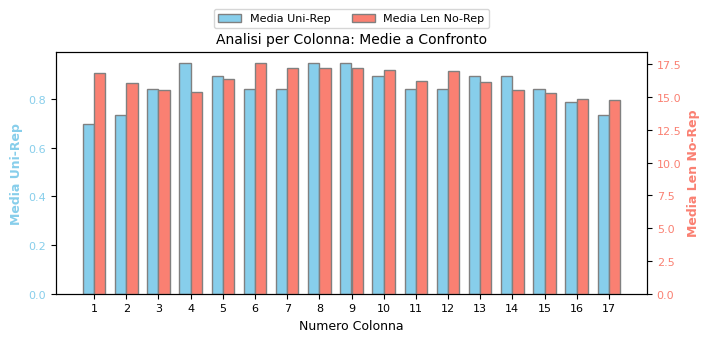

In [95]:
# --- 1. RAGGRUPPAMENTO PER COLONNA (Media + Doppio Asse Y) ---

# Raggruppiamo per 'Col' e calcoliamo la MEDIA per entrambe
df_col_stats = df_risultato.groupby("Col").agg({
    "Uni-Rep": "mean",
    "Len No-Rep": "mean"
})

# Rinominiamo le colonne
df_col_stats.columns = ["Media Uni-Rep", "Media Len No-Rep"]

print("Tabella Raggruppamento per Colonna:")
print(df_col_stats)

# --- CREAZIONE GRAFICO ---
# Creiamo la figura e il primo asse (sinistro)
fig, ax1 = plt.subplots(figsize=(7.2, 3.6)) # Dimensioni ridotte

# Creiamo il secondo asse (destro) che condivide la stessa X
ax2 = ax1.twinx()

# Impostazioni per le barre affiancate
indices = df_col_stats.index
width = 0.35 # Larghezza barre

# Disegno Barre 1 (Asse Sinistro - Azzurro) - Spostate leggermente a sinistra
bars1 = ax1.bar(indices - width/2, df_col_stats["Media Uni-Rep"], width,
                color='skyblue', label='Media Uni-Rep', edgecolor='grey')

# Disegno Barre 2 (Asse Destro - Salmone) - Spostate leggermente a destra
bars2 = ax2.bar(indices + width/2, df_col_stats["Media Len No-Rep"], width,
                color='salmon', label='Media Len No-Rep', edgecolor='grey')

# --- FORMATTAZIONE ---
ax1.set_xlabel("Numero Colonna", fontsize=9)
ax1.set_ylabel("Media Uni-Rep", fontsize=9, color='skyblue', fontweight='bold')
ax2.set_ylabel("Media Len No-Rep", fontsize=9, color='salmon', fontweight='bold')

# Coloriamo i numeri sugli assi per corrispondere alle barre
ax1.tick_params(axis='y', labelcolor='skyblue', labelsize=8)
ax2.tick_params(axis='y', labelcolor='salmon', labelsize=8)
ax1.tick_params(axis='x', labelsize=8)
ax1.set_xticks(indices) # Assicura che tutti i numeri colonna siano visibili

plt.title("Analisi per Colonna: Medie a Confronto", fontsize=10)

# Legenda Unificata (Combiniamo le legende dei due assi)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center',
           bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=8)

plt.tight_layout()
plt.show()

### Raggruppamento per nr ripetizioni unigram

Distribuzione Frequenza 'Uni-Rep' (Nr. Ripetizioni -> Quante Stringhe):
Uni-Rep
0    149
1    116
2     34
3     14
4      6
5      5
Name: count, dtype: int64


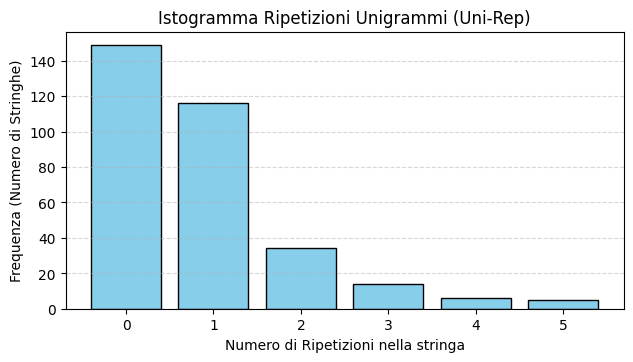

In [96]:
# --- 2. DISTRIBUZIONE UNI-REP ---

# Calcolo distribuzione di frequenza (conteggio delle occorrenze)
dist_uni_rep = df_risultato["Uni-Rep"].value_counts().sort_index()

print("Distribuzione Frequenza 'Uni-Rep' (Nr. Ripetizioni -> Quante Stringhe):")
print(dist_uni_rep)

# Istogramma
plt.figure(figsize=(7.2, 3.6))
# Bins allineati agli interi per vedere bene le barre discrete (0, 1, 2...)
bins_range = range(int(df_risultato["Uni-Rep"].min()), int(df_risultato["Uni-Rep"].max()) + 2)

plt.hist(df_risultato["Uni-Rep"], bins=bins_range, align='left', color='skyblue', edgecolor='black', rwidth=0.8)

plt.title("Istogramma Ripetizioni Unigrammi (Uni-Rep)")
plt.xlabel("Numero di Ripetizioni nella stringa")
plt.ylabel("Frequenza (Numero di Stringhe)")
plt.xticks(bins_range[:-1]) # Mostra tutti i numeri interi sull'asse X
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Raggruppamento per lunghezza sequenze senza rep

Distribuzione Frequenza 'Len No-Rep' (Lunghezza -> Quante volte osservata):
Len No-Rep
1      4
2      5
3      6
4      7
5      8
6      8
7     10
8     12
9     11
10    14
11    15
12    18
13    14
14    14
15    15
16    14
17    18
18    16
19    14
20     8
21     9
22     8
23     8
24     7
25     8
26     8
27     7
28     6
29     6
30     6
31     6
32     5
33     3
34     3
35     1
36     1
37     1
Name: count, dtype: int64


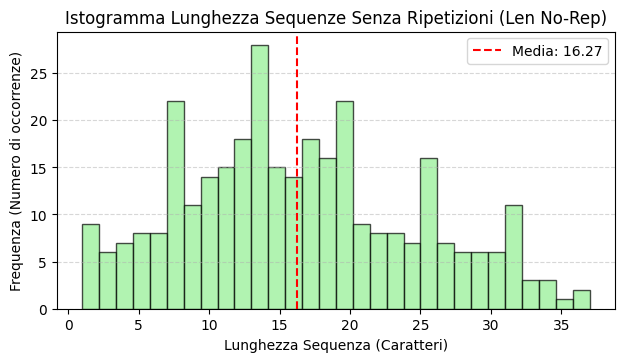

In [103]:
# --- 3. DISTRIBUZIONE LEN NO-REP ---

# Calcolo distribuzione di frequenza
dist_len_norep = df_risultato["Len No-Rep"].value_counts().sort_index()

print("Distribuzione Frequenza 'Len No-Rep' (Lunghezza -> Quante volte osservata):")
# Stampiamo solo le prime e ultime righe se sono troppe, o tutto se sono poche
print(dist_len_norep)

# Istogramma
plt.figure(figsize=(7.2, 3.6))

# Qui usiamo un numero di bin automatico o fisso, dato che il range potrebbe essere ampio
plt.hist(df_risultato["Len No-Rep"], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)

plt.title("Istogramma Lunghezza Sequenze Senza Ripetizioni (Len No-Rep)")
plt.xlabel("Lunghezza Sequenza (Caratteri)")
plt.ylabel("Frequenza (Numero di occorrenze)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Aggiungiamo una linea verticale per la media
media_val = df_risultato["Len No-Rep"].mean()
plt.axvline(media_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {media_val:.2f}')
plt.legend()

plt.show()

# **SALVATAGGIO**

### Salvataggio

In [ ]:
"""# **SALVATAGGIO DATI SU DRIVE**"""

import pickle
from google.colab import drive
import os

# 1. COLLEGA GOOGLE DRIVE
# Ti chiederà l'autorizzazione tramite popup la prima volta
drive.mount('/content/drive')

# Definisci la cartella dove salvare (creala se vuoi ordine nel tuo Drive)
path_cartella = '/content/drive/MyDrive/Colab'
if not os.path.exists(path_cartella):
    os.makedirs(path_cartella)

nome_file = 'Z340_analysis_jarvle_backup.pkl'
percorso_completo = os.path.join(path_cartella, nome_file)

# 2. SELEZIONA LE VARIABILI DA SALVARE
# Inserisci qui dentro tutte le variabili che vuoi conservare
dati_da_salvare = {
    # Testi
    "Z340PlainUnt": Z340PlainUnt,
    "Z340CipherUnt": Z340CipherUnt,
    "Z340_Transposed_153": Z340_Transposed_153, # Esempio output trasposizione

    # Chiavi
    # "Z340key_Extended": Z340key,
    # "Z408Key_Extended": Z408Key,

    # Risultati Analisi (DataFrames)
    # Assicurati che df_risultato esista prima di salvarlo
    "df_risultato": df_risultato if 'df_risultato' in locals() else None,

    # Qualsiasi altra variabile temporanea
    "temp_enciphered": temp_enciphered if 'temp_enciphered' in locals() else None
}

# 3. SALVATAGGIO SU DISCO
try:
    with open(percorso_completo, 'wb') as f:
        pickle.dump(dati_da_salvare, f)
    print(f"✅ Salvataggio completato con successo!")
    print(f"File salvato in: {percorso_completo}")
    print(f"Variabili salvate: {list(dati_da_salvare.keys())}")
except Exception as e:
    print(f"❌ Errore durante il salvataggio: {e}")

### Caricamento

In [ ]:
"""# **CARICAMENTO DATI DA DRIVE**"""

import pickle
from google.colab import drive
import os

# 1. COLLEGA GOOGLE DRIVE
drive.mount('/content/drive')

percorso_file = '/content/drive/MyDrive/Colab/Z340_analysis_jarvle_backup.pkl'

# 2. CARICAMENTO
if os.path.exists(percorso_file):
    try:
        with open(percorso_file, 'rb') as f:
            dati_caricati = pickle.load(f)

        # 3. RIPRISTINO VARIABILI
        # Estraiamo i dati dal dizionario e li rimettiamo nelle variabili globali
        Z340PlainUnt = dati_caricati.get("Z340PlainUnt")
        Z340CipherUnt = dati_caricati.get("Z340CipherUnt")
        Z340_Transposed_153 = dati_caricati.get("Z340_Transposed_153")

        Z340key_Extended = dati_caricati.get("Z340key_Extended")
        Z408Key_Extended = dati_caricati.get("Z408Key_Extended")

        df_risultato = dati_caricati.get("df_risultato")
        temp_enciphered = dati_caricati.get("temp_enciphered")

        print(f"✅ Dati ricaricati correttamente!")
        print(f"Ora puoi usare direttamente variabili come 'Z340key_Extended' o 'df_risultato'.")

        # Test rapido
        if df_risultato is not None:
            print("DataFrame ripristinato (prime righe):")
            print(df_risultato.head(3))

    except Exception as e:
        print(f"❌ Errore durante il caricamento: {e}")
else:
    print(f"⚠️ File non trovato: {percorso_file}. Hai eseguito il salvataggio la volta scorsa?")